In [1]:
greetings = "Assalam-o-Alaikum!"
greetings

'Assalam-o-Alaikum!'

In [2]:
### Exploratory Data Anaslysis

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as  sns
from scipy import stats

Dataset link: https://www.kaggle.com/CooperUnion/cardataset

In [4]:
df = pd.read_csv("data.csv")
df.head().T

,0,1,2,3,4
Make,BMW,BMW,BMW,BMW,BMW
Model,1 Series M,1 Series,1 Series,1 Series,1 Series
Year,2011,2011,2011,2011,2011
Engine Fuel Type,premium unleaded (required),premium unleaded (required),premium unleaded (required),premium unleaded (required),premium unleaded (required)
Engine HP,335,300,300,230,230
Engine Cylinders,6,6,6,6,6
Transmission Type,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL
Driven_Wheels,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive
Number of Doors,2,2,2,2,2
Market Category,"Factory Tuner,Luxury,High-Performance","Luxury,Performance","Luxury,High-Performance","Luxury,Performance",Luxury


In [5]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [7]:
# convert float to int
df["city mpg"] = df["city mpg"].astype("int")

In [8]:
# convert mpg to L/100km
df["city mpg"] = 235 / df["city mpg"]

In [9]:
# rename city mpg to city L/100km
df.rename(columns = {"city mpg": "City L/100km"}, inplace = True)

In [10]:
# type
df["highway MPG"] = df["highway MPG"].astype("int")

In [11]:
# convert mpg to L/100km
df["highway MPG"] = 235 / df["highway MPG"]

In [12]:
# rename highway MPG to Highway L/100km
df.rename(columns = {"highway MPG": "Highway L/100km"}, inplace = True)
df.head().T

,0,1,2,3,4
Make,BMW,BMW,BMW,BMW,BMW
Model,1 Series M,1 Series,1 Series,1 Series,1 Series
Year,2011,2011,2011,2011,2011
Engine Fuel Type,premium unleaded (required),premium unleaded (required),premium unleaded (required),premium unleaded (required),premium unleaded (required)
Engine HP,335,300,300,230,230
Engine Cylinders,6,6,6,6,6
Transmission Type,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL
Driven_Wheels,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive
Number of Doors,2,2,2,2,2
Market Category,"Factory Tuner,Luxury,High-Performance","Luxury,Performance","Luxury,High-Performance","Luxury,Performance",Luxury


In [13]:
df.count().to_frame()

,0
Make,11914
Model,11914
Year,11914
Engine Fuel Type,11911
Engine HP,11845
Engine Cylinders,11884
Transmission Type,11914
Driven_Wheels,11914
Number of Doors,11908
Market Category,8172


In [14]:
c = df["Driven_Wheels"].value_counts().to_frame()
c

,Driven_Wheels
front wheel drive,4787
rear wheel drive,3371
all wheel drive,2353
four wheel drive,1403


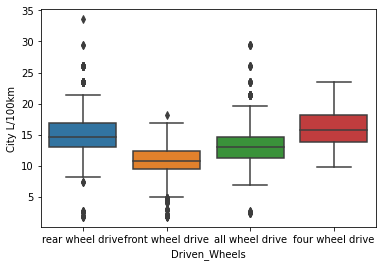

In [15]:
# box plot
sns.boxplot(x = "Driven_Wheels", y = "City L/100km", data = df)


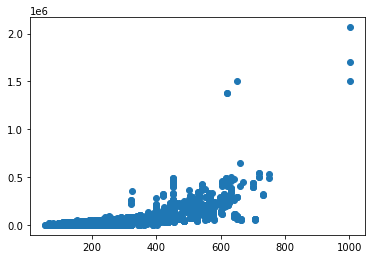

In [16]:
# scatter plot
plt.scatter(x = "Engine HP", y = "MSRP", data = df)
plt.show()

In [17]:
# Group by
df_test = df[["Driven_Wheels", "Vehicle Style", "MSRP"]]
df_grp = df_test.groupby(["Driven_Wheels", "Vehicle Style"]).mean()
df_grp

MSRP
Driven_Wheels     Vehicle Style                     
all wheel drive   2dr Hatchback          9240.800000
                  2dr SUV               35551.363636
                  4dr Hatchback         32109.603960
                  4dr SUV               40842.668699
                  Cargo Minivan         25025.000000
                  Cargo Van             32760.000000
                  Convertible          166135.094340
                  Convertible SUV       47975.000000
                  Coupe                153839.522843
                  Crew Cab Pickup       38490.810811
                  Extended Cab Pickup   38370.000000
                  Passenger Minivan     27812.132075
                  Passenger Van         34525.000000
                  Regular Cab Pickup     5667.000000
                  Sedan                 54452.355556
                  Wagon                 37358.648148
four wheel drive  2dr Hatchback          2000.000000
                  2dr SUV                8162.347826
                  4dr Hatchback          2000.000000
                  4dr SUV               50361.705645
                  Convertible SUV       11766.533333
                  Crew Cab Pickup       38631.300578
                  Extended Cab Pickup   24808.683333
                  Passenger Minivan      2000.000000
                  Regular Cab Pickup    18602.089744
                  Sedan                 16145.000000
                  Wagon                  2000.000000
front wheel drive 2dr Hatchback         17050.186047
                  4dr Hatchback         20567.740995
                  4dr SUV               31842.499208
                  Cargo Minivan         21535.925926
                  Convertible           25751.936441
                  Coupe                 14316.455621
                  Crew Cab Pickup       32743.000000
                  Passenger Minivan     27436.131498
                  Sedan                 23017.168817
                  Wagon                 22324.935574
rear wheel drive  2dr Hatchback         17805.571429
                  2dr SUV                7614.293103
                  4dr Hatchback         44671.363636
                  4dr SUV               40605.856764
                  Cargo Minivan         15663.636364
                  Cargo Van             14904.311828
                  Convertible           95570.024390
                  Convertible SUV        9880.777778
                  Coupe                 84602.618343
                  Crew Cab Pickup       35470.419795
                  Extended Cab Pickup   20278.052795
                  Passenger Minivan      6979.393939
                  Passenger Van         28927.746032
                  Regular Cab Pickup    14239.408511
                  Sedan                 71489.547009
                  Wagon                 15745.671429

In [18]:
mean = df["Engine HP"].mean(axis = 0)
df["Engine HP"].replace(np.nan, mean, inplace = True)

# pearson correlation
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df["Engine HP"], df["MSRP"])
p_value

0.0

In [19]:
pearson_coef

0.6616442014272395

### Exploratory Data Analysis of Automobile DataSet

In [20]:
df = pd.read_csv("automobile.csv")
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [21]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm               int64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [22]:
df["peak-rpm"].dtype

dtype('int64')

In [23]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.196837,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.277962,-0.206945,-0.178515,0.065759,0.178287,-0.035823,0.034606,-0.071461
normalized-losses,0.196837,1.000000,-0.196317,-0.236562,-0.196650,-0.167410,-0.261289,-0.301343,-0.213760,-0.141477,-0.068856,-0.182771,0.240000,0.150868,0.171033,-0.237939
wheel-base,-0.531954,-0.196317,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.317327,0.158493,0.249786,0.351681,-0.215763,-0.470414,-0.544082,0.578804
length,-0.357612,-0.236562,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.356788,0.121432,0.158414,0.526253,-0.226995,-0.670909,-0.704662,0.685019
width,-0.232919,-0.196650,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.294745,0.115629,0.181129,0.614047,-0.172620,-0.642704,-0.677218,0.695654
height,-0.541038,-0.167410,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.292481,0.164468,0.261214,-0.097632,-0.194241,-0.048640,-0.107358,0.158436
curb-weight,-0.227691,-0.261289,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.361939,0.128491,0.151362,0.728550,-0.177832,-0.757414,-0.797465,0.799773
engine-size,-0.105790,-0.301343,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.454764,0.267614,0.028971,0.781577,-0.176800,-0.653658,-0.677470,0.838097
bore,-0.277962,-0.213760,0.317327,0.356788,0.294745,0.292481,0.361939,0.454764,1.000000,0.692218,0.025434,0.257158,-0.268475,-0.137850,-0.159724,0.264096
stroke,-0.206945,-0.141477,0.158493,0.121432,0.115629,0.164468,0.128491,0.267614,0.692218,1.000000,0.127896,0.001576,-0.265609,0.126286,0.105639,0.048860


In [24]:
df_col = df[["bore", "stroke", "compression-ratio", "horsepower"]]
df_col.corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,0.692218,0.025434,0.257158
stroke,0.692218,1.000000,0.127896,0.001576
compression-ratio,0.025434,0.127896,1.000000,-0.190032
horsepower,0.257158,0.001576,-0.190032,1.000000


(0.0, 52787.247832801855)

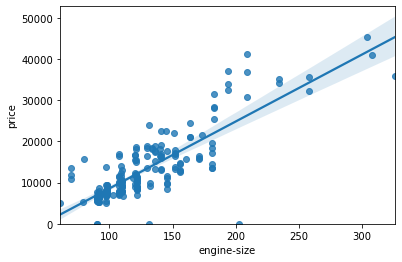

In [25]:
# scatterplot of "engine-size" and "price"
sns.regplot(x = "engine-size", y = "price", data = df)
plt.ylim(0,)

In [26]:
# correlation between engine-size nd price
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.838097
price,0.838097,1.000000


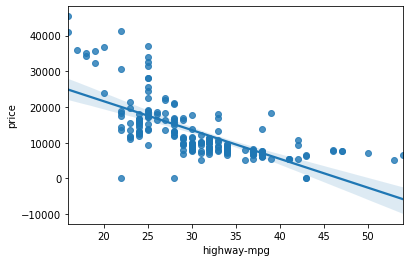

In [27]:
sns.regplot(x = "highway-mpg", y = "price", data = df)

In [28]:
# correlation
df[["highway-mpg", "price"]].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.687675
price,-0.687675,1.000000


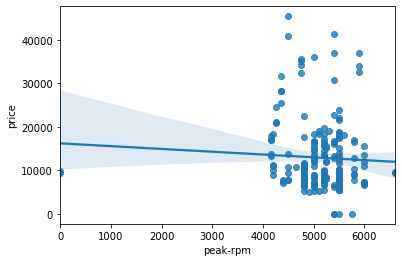

In [29]:
sns.regplot(x = "peak-rpm", y = "price", data = df)

In [30]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.055278
price,-0.055278,1.000000


In [31]:
# correlation between x="stroke", y="price"
df[["stroke", "price"]].corr()

,stroke,price
stroke,1.00000,0.04886
price,0.04886,1.00000


(0.0, 47670.0)

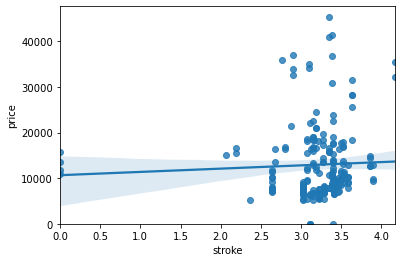

In [32]:
sns.regplot(x = "stroke", y = "price", data = df)
plt.ylim(0,)

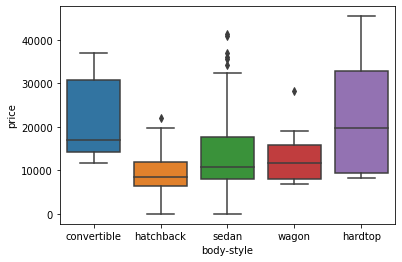

In [33]:
# categorical variables
sns.boxplot(x = "body-style", y = "price", data = df)

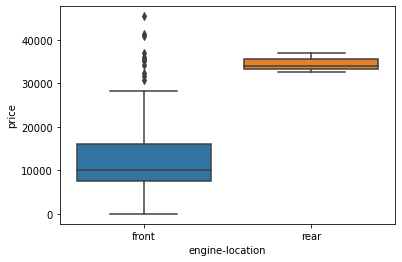

In [34]:
# examine "engine-location" and "price"
sns.boxplot(x = "engine-location", y = "price", data = df)

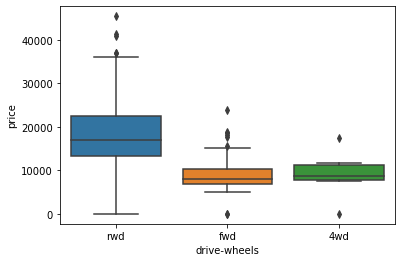

In [35]:
# drive-wheels
sns.boxplot(x="drive-wheels", y="price", data=df)

In [36]:
# descriptive Staatistical analysis
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,97.600000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.264780,3.191902,10.142537,103.239024,5075.365854,25.219512,30.751220,12949.429268
std,1.245307,58.282073,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.535268,0.549625,3.972040,40.832470,694.650771,6.542142,6.886443,8079.043284
min,-2.000000,0.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,0.000000,0.000000,7.000000,0.000000,0.000000,13.000000,16.000000,0.000000
25%,0.000000,77.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.130000,3.100000,8.600000,70.000000,4800.000000,19.000000,25.000000,7689.000000
50%,1.000000,103.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10198.000000
75%,2.000000,137.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [37]:
df.describe(include = ["object"])

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,205,205,205,205,205,205,205,205,205,205
unique,22,2,2,3,5,3,2,7,7,8
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,32,185,168,114,96,120,202,148,159,94


In [38]:
# value counts
df["drive-wheels"].value_counts()

fwd    120
rwd     76
4wd      9
Name: drive-wheels, dtype: int64

In [39]:
# dataframe
df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,120
rwd,76
4wd,9


In [40]:
# Rename
drive_wheel_counts = df["drive-wheels"].value_counts().to_frame()
drive_wheel_counts.rename(columns = {"drive-wheels": "value_counts"}, inplace = True)
drive_wheel_counts

,value_counts
fwd,120
rwd,76
4wd,9


In [41]:
drive_wheel_counts.index.name = "drive-wheels"
drive_wheel_counts

,value_counts
drive-wheels,
fwd,120
rwd,76
4wd,9


In [42]:
engine = df["engine-location"].value_counts().to_frame()
engine.rename(columns = {"engine-location": "value_counts"}, inplace = True)
engine.index.name = "engine-location"
engine.head()

,value_counts
engine-location,
front,202
rear,3


In [43]:
# GROUPING

df["drive-wheels"].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [44]:
df_group1 = df[["drive-wheels", "body-style", "price"]]

In [45]:
# grouping results
df_group1 = df_group1.groupby(["drive-wheels"], as_index = False).mean()
df_group1

,drive-wheels,price
0,4wd,9103.111111
1,fwd,9090.700000
2,rwd,19497.644737


In [46]:
# grouping results
df_gptest = df[["drive-wheels", "body-style", "price"]]
group_test = df_gptest.groupby(["drive-wheels", "body-style"], as_index = False).mean()
group_test

,drive-wheels,body-style,price
0,4wd,hatchback,3801.500000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9467.526316
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [47]:
# pivot_table
grouped_pivot = group_test.pivot(index = "drive-wheels", columns = "body-style")
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   3801.500000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9467.526316   
rwd              23949.6  24202.714286  13583.157895  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [48]:
grouped_pivot = grouped_pivot.fillna(0)
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   3801.500000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9467.526316   
rwd              23949.6  24202.714286  13583.157895  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [49]:
df_gptest2 = df[["body-style", "price"]]
grouped_test_bodystyle = df_gptest2.groupby(["body-style"], as_index = False).mean()
grouped_test_bodystyle

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9672.942857
3,sedan,14158.510417
4,wagon,12371.960000


In [50]:
import matplotlib.pyplot as plt
%matplotlib inline 

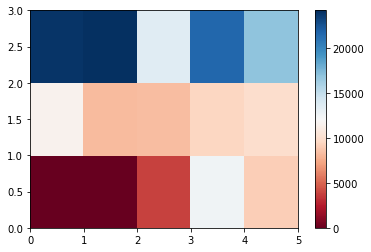

In [52]:
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

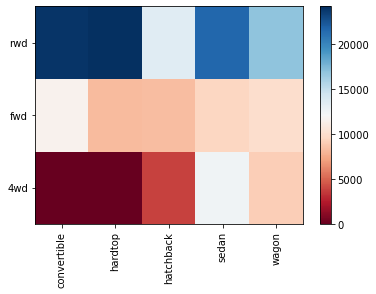

In [53]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index
#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [54]:
# pearson correlation
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.196837,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.277962,-0.206945,-0.178515,0.065759,0.178287,-0.035823,0.034606,-0.071461
normalized-losses,0.196837,1.000000,-0.196317,-0.236562,-0.196650,-0.167410,-0.261289,-0.301343,-0.213760,-0.141477,-0.068856,-0.182771,0.240000,0.150868,0.171033,-0.237939
wheel-base,-0.531954,-0.196317,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.317327,0.158493,0.249786,0.351681,-0.215763,-0.470414,-0.544082,0.578804
length,-0.357612,-0.236562,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.356788,0.121432,0.158414,0.526253,-0.226995,-0.670909,-0.704662,0.685019
width,-0.232919,-0.196650,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.294745,0.115629,0.181129,0.614047,-0.172620,-0.642704,-0.677218,0.695654
height,-0.541038,-0.167410,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.292481,0.164468,0.261214,-0.097632,-0.194241,-0.048640,-0.107358,0.158436
curb-weight,-0.227691,-0.261289,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.361939,0.128491,0.151362,0.728550,-0.177832,-0.757414,-0.797465,0.799773
engine-size,-0.105790,-0.301343,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.454764,0.267614,0.028971,0.781577,-0.176800,-0.653658,-0.677470,0.838097
bore,-0.277962,-0.213760,0.317327,0.356788,0.294745,0.292481,0.361939,0.454764,1.000000,0.692218,0.025434,0.257158,-0.268475,-0.137850,-0.159724,0.264096
stroke,-0.206945,-0.141477,0.158493,0.121432,0.115629,0.164468,0.128491,0.267614,0.692218,1.000000,0.127896,0.001576,-0.265609,0.126286,0.105639,0.048860


**pearson correlation**

In [56]:
#  Pearson Correlation Coefficient and P-value of Wheel-base vs Price
pearson_coef, p_value = stats.pearsonr(df["wheel-base"], df["price"])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.5788039629289591  with a P-value of P = 9.919365981336874e-20


In [57]:
#  Pearson Correlation Coefficient and P-value of Horsepower vs Price
pearson_coef, p_value = stats.pearsonr(df["horsepower"], df["price"])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.6912878787942786  with a P-value of P =  1.8175735366189504e-30


In [58]:
#  Pearson Correlation Coefficient and P-value of Length vs Price
pearson_coef, p_value = stats.pearsonr(df["length"], df["price"])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is 0.6850187941867715  with a P-value of P =  9.679736119227286e-30


In [59]:
#  Pearson Correlation Coefficient and P-value of Width vs Price
pearson_coef, p_value = stats.pearsonr(df["width"], df["price"])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

The Pearson Correlation Coefficient is 0.6956544974497308  with a P-value of P = 5.527319957655985e-31


In [61]:
#  Pearson Correlation Coefficient and P-value of Curb-Weigth vs Price
pearson_coef, p_value = stats.pearsonr(df["curb-weight"], df["price"])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is 0.7997728040770843  with a P-value of P =  7.1234631942809375e-47


In [62]:
#  Pearson Correlation Coefficient and P-value of Engine-size vs Price
pearson_coef, p_value = stats.pearsonr(df["engine-size"], df["price"])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.8380972858386329  with a P-value of P = 2.4898087727398237e-55


In [63]:
#  Pearson Correlation Coefficient and P-value of Bore vs Price
pearson_coef, p_value = stats.pearsonr(df["bore"], df["price"])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value )

The Pearson Correlation Coefficient is 0.2640960301221324  with a P-value of P =   0.0001300759906556395


In [64]:
#  Pearson Correlation Coefficient and P-value of city-mpg vs Price
pearson_coef, p_value = stats.pearsonr(df["city-mpg"], df["price"])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is -0.6600259399668421  with a P-value of P =  5.114460930418402e-27


In [65]:
#  Pearson Correlation Coefficient and P-value of highway-mpg vs Price
pearson_coef, p_value = stats.pearsonr(df["highway-mpg"], df["price"])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value )

The Pearson Correlation Coefficient is -0.6876750740856993  with a P-value of P =  4.789993211390945e-30


**ANOVA**

In [74]:
df_gptest = df[["drive-wheels","body-style","price"]]

In [80]:
grouped_test2=df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head(2)

,drive-wheels,price
0,rwd,13495
1,rwd,16500
3,fwd,13950
4,4wd,17450
5,fwd,15250
9,4wd,0


In [81]:
df_gptest

,drive-wheels,body-style,price
0,rwd,convertible,13495
1,rwd,convertible,16500
2,rwd,hatchback,16500
3,fwd,sedan,13950
4,4wd,sedan,17450
...,...,...,...
200,rwd,sedan,16845
201,rwd,sedan,19045
202,rwd,sedan,21485
203,rwd,sedan,22470


In [82]:
grouped_test2.get_group("4wd")["price"]

4      17450
9          0
140     7603
144     9233
145    11259
148     8013
149    11694
154     7898
155     8778
Name: price, dtype: int64

In [83]:
# f-test and p-value of fwd, rwd, 4wd
f_val, p_val = stats.f_oneway(grouped_test2.get_group("fwd")["price"], grouped_test2.get_group("rwd")["price"], grouped_test2.get_group("4wd")["price"])
print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 64.28440184196305 , P = 2.4833608991365896e-22


In [85]:
# fwd and rwd
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 122.70383417024505 , P = 2.0574853192713905e-22


In [86]:
# 4wd and rwd
f_val, p_val = stats.f_oneway(grouped_test2.get_group("4wd")["price"], grouped_test2.get_group("rwd")["price"])
print("ANOVA results: F=", f_val, ", P =", p_val)  

ANOVA results: F= 10.837775810874803 , P = 0.0014620960345262835


In [87]:
# 4wd and fwd
f_val, p_val = stats.f_oneway(grouped_test2.get_group("4wd")["price"], grouped_test2.get_group("fwd")["price"])
print("ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 9.94522681658615e-05 , P = 0.9920588161468678
